<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/K_NEAREST_NEIGHBORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd  # Import standard modules
from sklearn.neighbors import KNeighborsClassifier

importing Model from Scikit.learn

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd  # Import standard modules
import io
import urllib3

># Reading the Dataset

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

># Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

># Data Exploratory Analysis EDA

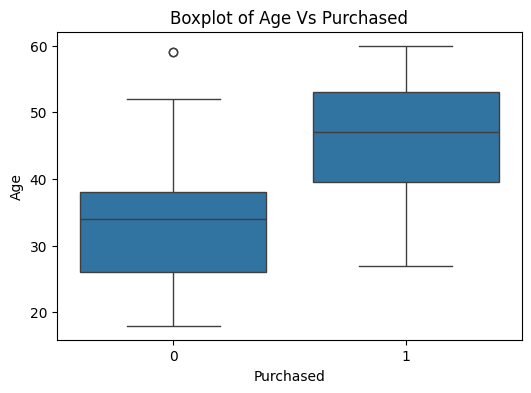

In [ ]:
import seaborn as sns
plt.figure(figsize = (6,4))
sns.boxplot(x= 'Purchased', y ="Age", data =df)
plt.title("Boxplot of Age Vs Purchased")
plt.xlabel("Purchased")
plt.ylabel("Age")
plt.show()

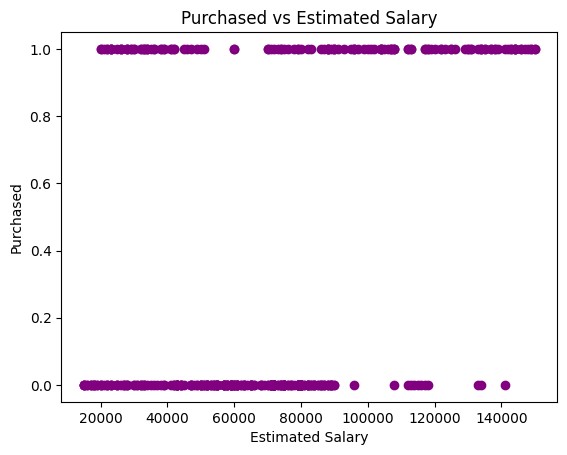

In [ ]:
plt.plot('EstimatedSalary','Purchased', data =df, linestyle ='none', marker ='o', color = "purple")
plt.xlabel('Estimated Salary')
plt.ylabel("Purchased")
plt.title("Purchased vs Estimated Salary")
plt.show()

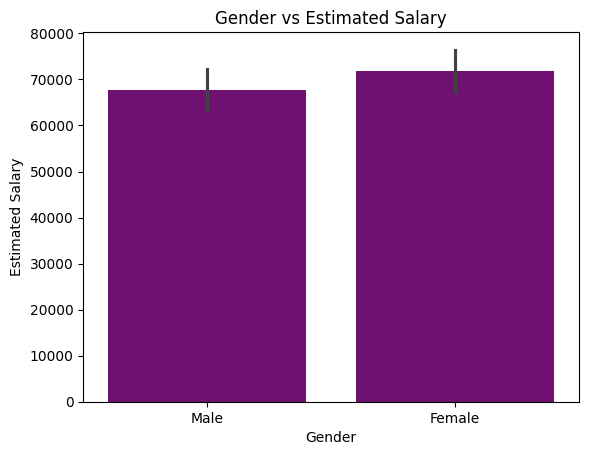

In [ ]:
sns.barplot(x = "Gender", y= 'EstimatedSalary', data =df, color = "purple")
plt.ylabel('Estimated Salary')
plt.xlabel("Gender")
plt.title("Gender vs Estimated Salary")
plt.show()

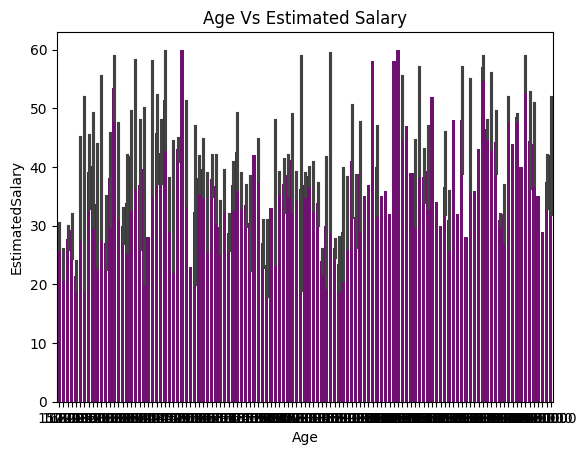

In [ ]:
sns.barplot(x='EstimatedSalary', y='Age', color = "purple", data= df)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Age Vs Estimated Salary')
plt.show()

># splitting the datasets into the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
knn_sklearn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:

#Training the K-NN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p= 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# predicting the K-NN model on the training set
y_pred = classifier.predict(x_test)

In [ ]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [ ]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
ac

0.95

In [ ]:
cm

array([[55,  3],
       [ 1, 21]])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Visualizating the training set results
x_set, y_set = x_train, y_train
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop= x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop= x_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.rave1(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightcoral','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set ==j,1],
                c = ListedColormap(('red','green'))(i), label = j)
plt.title('K-NN(Training set)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
olt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'rave1'

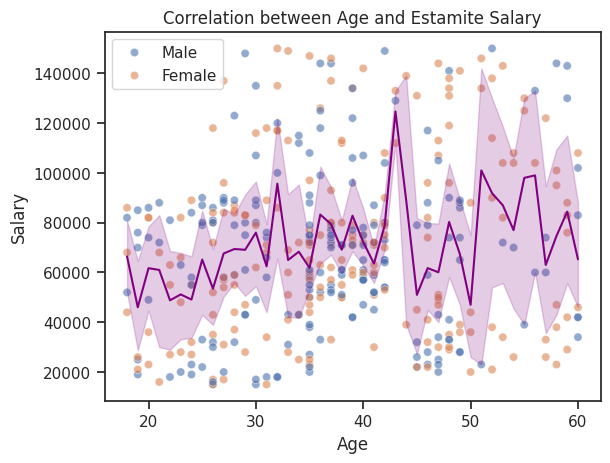

In [ ]:



sns.set_theme(style="ticks")


sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue= "Gender", color="skyblue", marker='o', alpha=0.6)


sns.lineplot(data=df, x="Age", y="EstimatedSalary", color="purple")


plt.title('Correlation between Age and Estamite Salary')


plt.xlabel('Age')


plt.ylabel('Salary')


plt.show()

In [ ]:
knn_sklearn.fit(x_train,y_train)

KNeighborsClassifier()

># Classification Evaluation Matrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Accuracy

In [ ]:
accuracy = accuracy_score (y_test, y_pred)
print("Accuracy is: ", accuracy)

Accuracy is:  0.95


># Precision

In [ ]:
precision = precision_score(y_test,y_pred)
print("Precision is: ", precision)

Precision is:  0.875


># Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall is: ", recall)

Recall is:  0.9545454545454546


># F1 Score

In [ ]:
f1 = f1_score(y_test,y_pred)
print("f1_score is: ", f1)

f1_score is:  0.9130434782608695


># Generating the Confusion Matrix

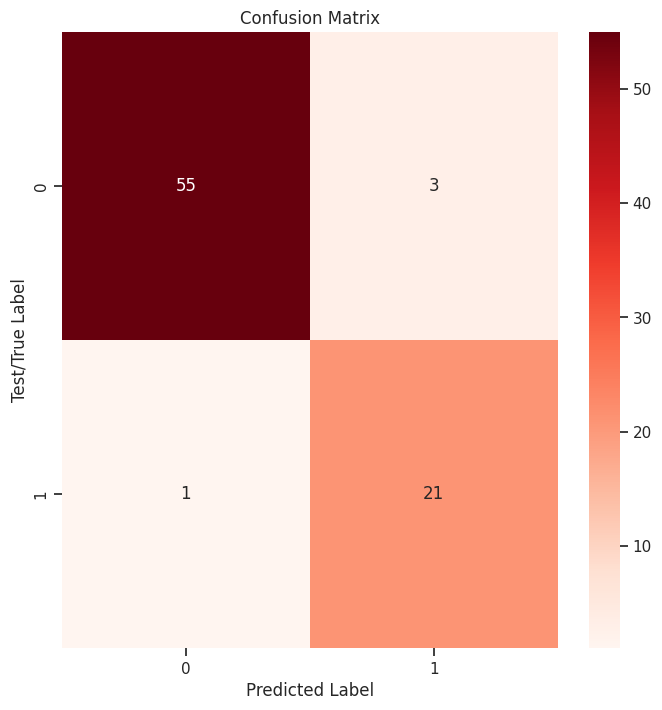

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')
plt.title('Confusion Matrix')
plt.ylabel('Test/True Label')
plt.xlabel('Predicted Label')
plt.show()